In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten


In [2]:
tf_version = tf.__version__
tf_version

'2.10.0'

In [3]:
print(tf.config.list_physical_devices('GPU'))

[]


## Load the data

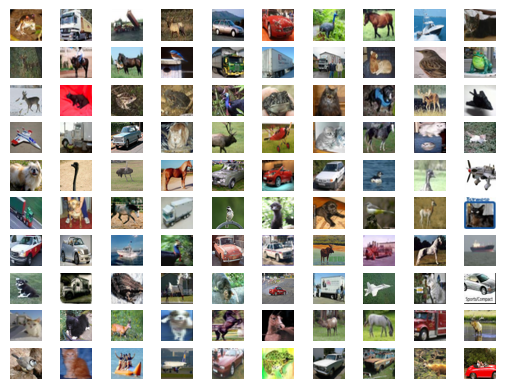

In [4]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print('No. of target values =',len(np.unique(y_train)))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
No. of target values = 10


In [7]:
X_train =  X_train.astype('float32')# ...                     change the type towards float32
X_test =   X_test.astype('float32')# ...                     idem
X_train /= 255.0# ...                     normalize the range to be between 0.0 and 1.0
X_test /=  255.0# ...
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) test samples


In [8]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)# ...                  modify targets to 1-hot using utils.to_categorical()
Y_test = keras.utils.to_categorical(y_test, n_classes)# ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### MLP and weight visualisation

In [9]:
model = keras.Sequential([
    Conv2D(32, strides=1, input_shape=(32, 32, 3), padding='same', kernel_size=4),
    Activation('relu'),
    MaxPooling2D(pool_size = 2),
    Flatten(),
    Dense(n_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        1568      
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 83,498
Trainable params: 83,498
Non-trainable params: 0
____________________________________________________

In [10]:
E = 5              # number of epochs
B = 128 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train,Y_train, batch_size=B, epochs=E, verbose=0, validation_data=(X_test,Y_test))

loss_train,metric_train = model.evaluate(X_train, Y_train, verbose=1)
loss_test, metric_test = model.evaluate(X_test, Y_test,verbose=1)    # ... evaluate model performance on test set, verbose tells progressbar of code, 0 means no progress bar, 1 means progressbar indicating the progress of evaluation, 2 means prints one line for every epoch during evaluation showing the overall progress.
print('Train loss:', loss_train)
print('Train accuracy:', metric_train)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.1250 - accuracy: 0.6081
Train loss: 1.0225242376327515
Train accuracy: 0.650600016117096
Test loss: 1.1249560117721558
Test accuracy: 0.6080999970436096


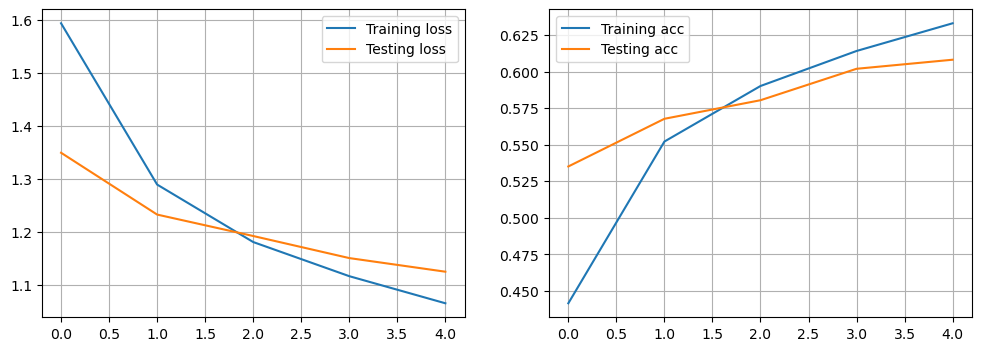

In [11]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

(4, 4, 3, 32)
(32,)
(8192, 10)
(10,)


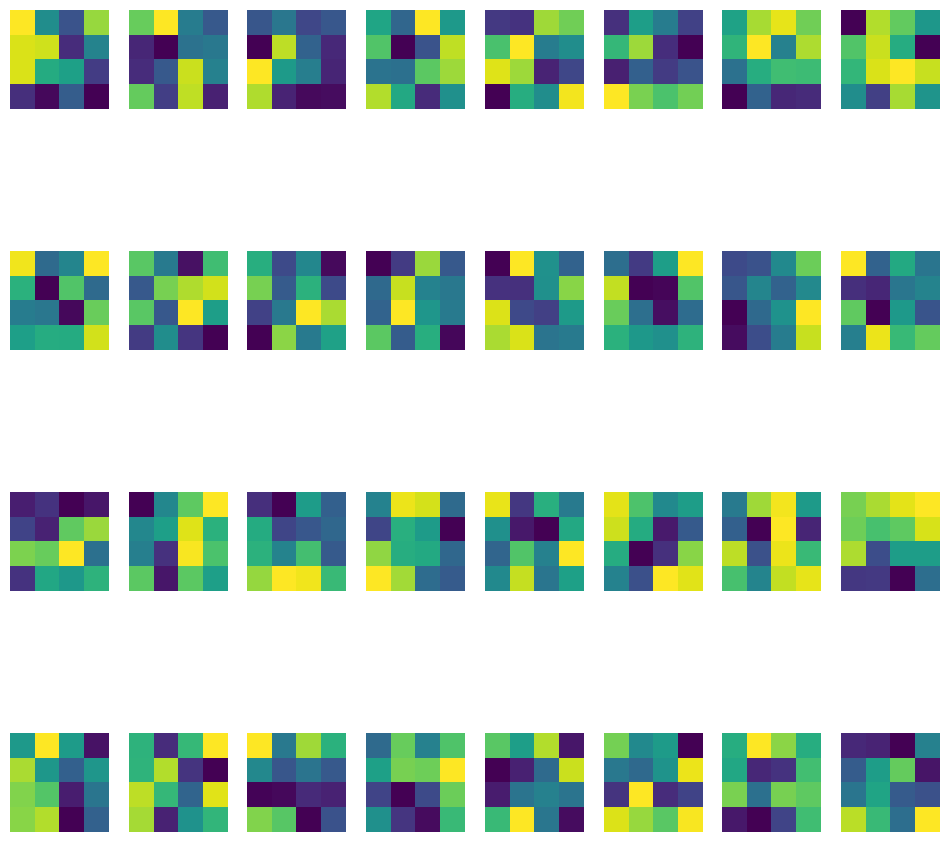

In [12]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(32):
    ax = f.add_subplot(4, 8, 1+i)
    im = w1[:,:,:,i]                  # get the weights landing to neuron i
       
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im[:,:,0])

### 2nd Architecture

In [13]:
model = keras.Sequential([
    Conv2D(32, strides=1, input_shape=(32, 32, 3), padding='same', kernel_size=4),
    Activation('relu'),
    Conv2D(32, strides=1,  padding='same', kernel_size=4),
    Activation('relu'),
    Conv2D(32, strides=1 , padding='same', kernel_size=4),
    Activation('relu'),
    MaxPooling2D(pool_size = 2),
    Flatten(),
    Dense(n_classes, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        1568      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        16416     
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        16416     
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)      

In [14]:
E = 10              # number of epochs
B = 128 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train,Y_train, batch_size=B, epochs=E, verbose=0, validation_data=(X_test,Y_test))

loss_train,metric_train = model.evaluate(X_train, Y_train, verbose=1)
loss_test, metric_test = model.evaluate(X_test, Y_test,verbose=1)    # ... evaluate model performance on test set, verbose tells progressbar of code, 0 means no progress bar, 1 means progressbar indicating the progress of evaluation, 2 means prints one line for every epoch during evaluation showing the overall progress.
print('Train loss:', loss_train)
print('Train accuracy:', metric_train)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 9s 28ms/step - loss: 1.0547 - accuracy: 0.6787
Train loss: 0.42730820178985596
Train accuracy: 0.8583800196647644
Test loss: 1.054685354232788
Test accuracy: 0.6786999702453613


### 3rd Architecture

In [15]:
model = keras.Sequential([
    Conv2D(50, strides=1, input_shape=(32, 32, 3), padding='same', kernel_size=5),
    Activation('relu'),
    Conv2D(50, strides=2, padding='same', kernel_size=5),
    Activation('relu'),
    MaxPooling2D(pool_size = 3),
    Flatten(),
    Dense(n_classes, activation='softmax'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 50)        3800      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 50)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 50)        62550     
                                                                 
 activation_5 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 50)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1250)              0         
                                                      

In [16]:
E = 5             # number of epochs
B = 128 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train,Y_train, batch_size=B, epochs=E, verbose=0, validation_data=(X_test,Y_test))

loss_train,metric_train = model.evaluate(X_train, Y_train, verbose=1)
loss_test, metric_test = model.evaluate(X_test, Y_test,verbose=1)    # ... evaluate model performance on test set, verbose tells progressbar of code, 0 means no progress bar, 1 means progressbar indicating the progress of evaluation, 2 means prints one line for every epoch during evaluation showing the overall progress.
print('Train loss:', loss_train)
print('Train accuracy:', metric_train)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0223 - accuracy: 0.6444
Train loss: 0.9478728771209717
Train accuracy: 0.6754000186920166
Test loss: 1.0222710371017456
Test accuracy: 0.6444000005722046
